In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from PIL import Image
def Load_Images(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath + '/' + i)
        for j in l2[:1000]:
            c = 0
            img = Image.open(impath + i + '/' + j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            #img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label

In [3]:
x, y = Load_Images('./dataset/Training/')
a = pd.Series(y, dtype = 'category')

In [4]:
def plot_data(data, classes):
  
  values = data.value_counts().sort_index(ascending=True)
  plt.figure(figsize=[30, 10])
  
  plt.bar(x=classes, height=values, edgecolor='black')

  plt.xlabel("Emotions")
  plt.ylabel("Amount")
  plt.title("Amount of emotions")
  plt.show();

In [5]:
classes = ['Angrily Disguisted',
'Angrily Surprised',
'Happily Disguisted',
'Happily Surprised',
'Sadly Angry',
'Disgustedly Surprised',
'Fearfully Angry',
'Fearfully Disguisted',
'Fearfully Surprised',
'Sadly Disguisted',
'Sadly Fearful',
'Sadly Surprised',
'Awed',
'Hatred',
'Appalled']

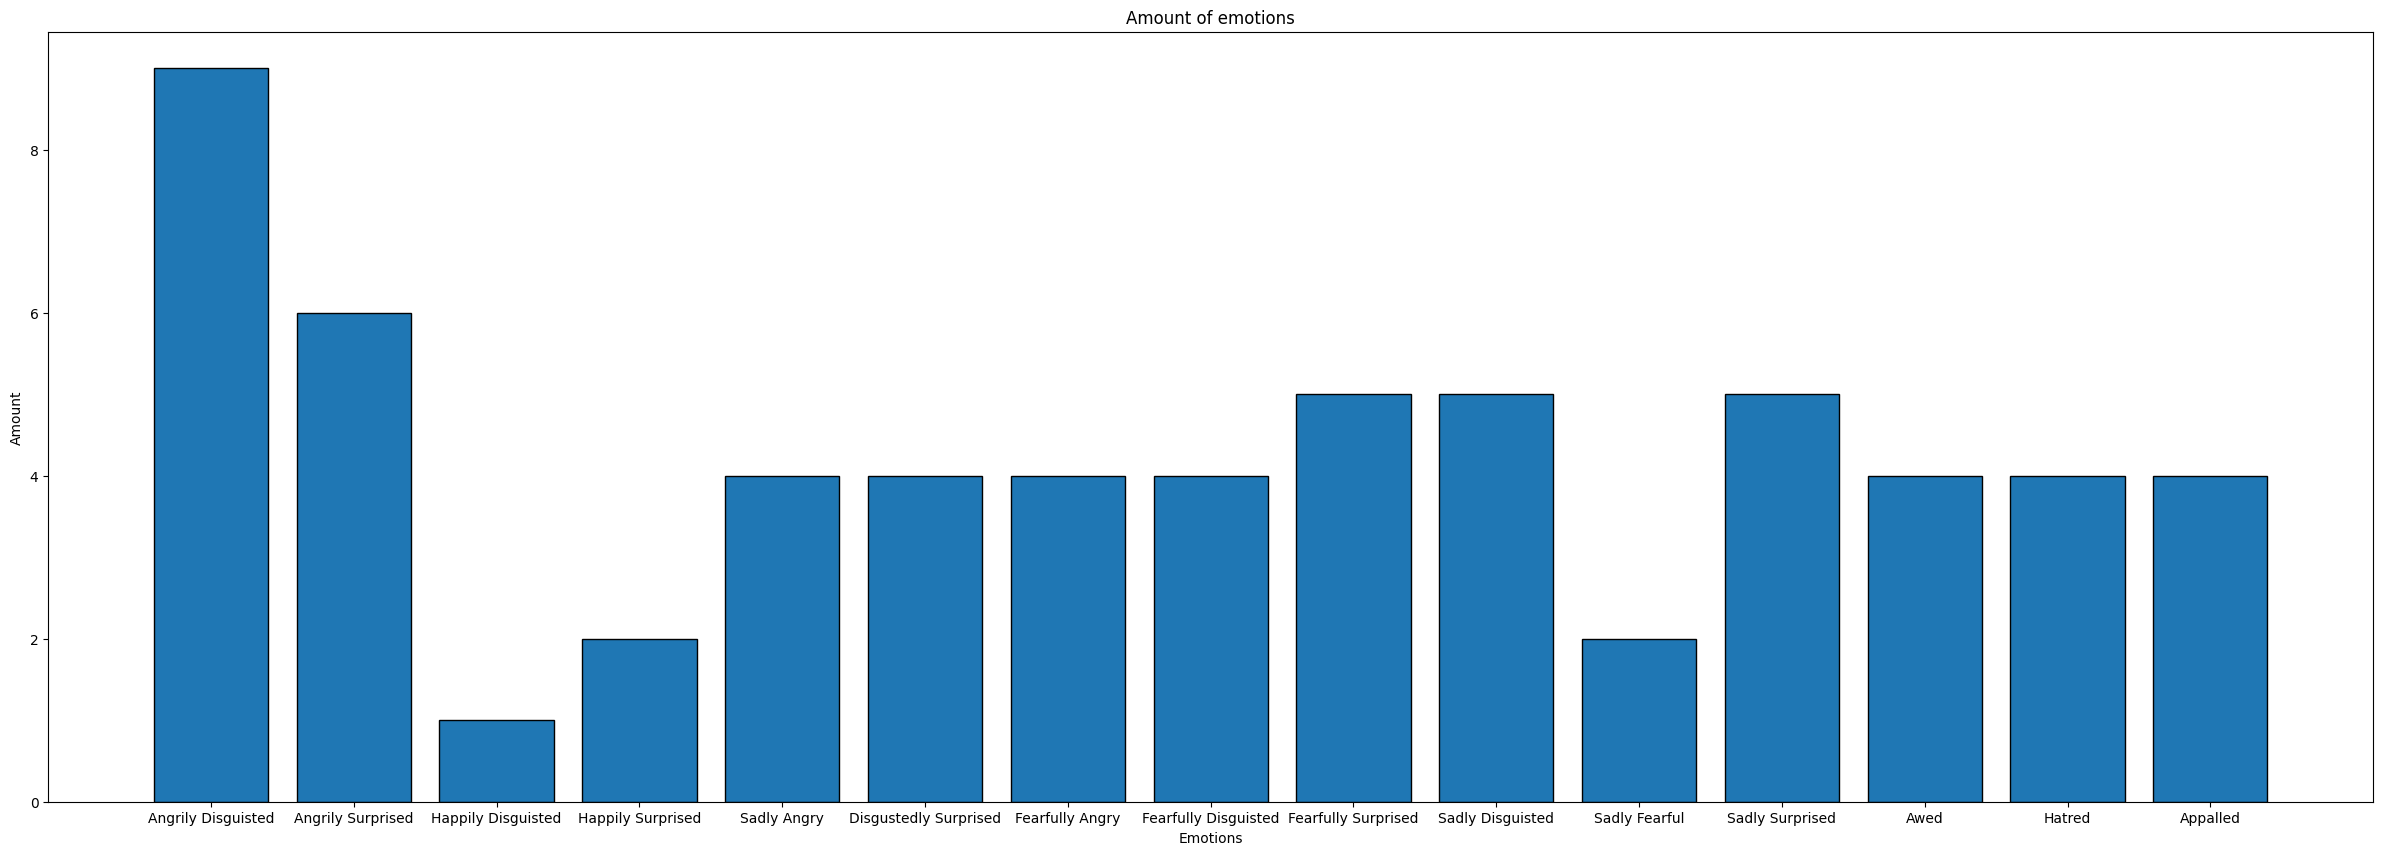

In [6]:
plot_data(a, classes)

In [7]:
import cv2

dataset_path = "./dataset/Training"

label1 = list()
value1 = list()

for root, dirs, files in os.walk(dataset_path):
    emotion = os.path.basename(root)
    for file in files:
        path = os.path.join(root, file)
        label1.append(emotion)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        value1.append(img)

In [8]:
df_training = pd.DataFrame.from_dict({'emotions': label1, 'img': value1})

In [9]:
import cv2

dataset_path = "./dataset/Testing"

label2 = list()
value2 = list()

for root, dirs, files in os.walk(dataset_path):
    emotion = os.path.basename(root)
    for file in files:
        path = os.path.join(root, file)
        label2.append(emotion)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        value2.append(img)

In [10]:
df_testing = pd.DataFrame.from_dict({'emotions': label2, 'img': value2})

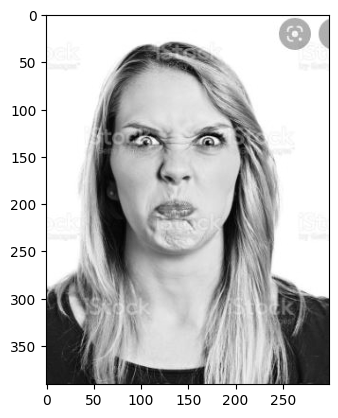

In [11]:
plt.imshow(df_training['img'][0], cmap='gray')
plt.show()

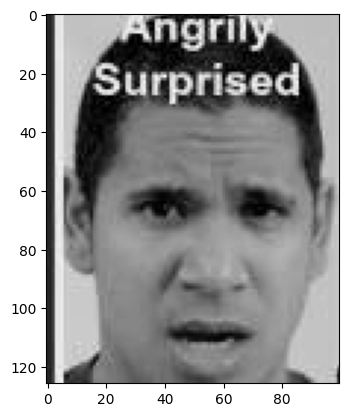

In [12]:
plt.imshow(df_testing['img'][1], cmap='gray')
plt.show()

In [13]:
df_training.to_csv('training_data.csv', index=False, encoding='utf-8-sig')
df_testing.to_csv('testing_data.csv', index=False, encoding='utf-8-sig')

In [14]:
import json
df_training['img'] = df_training['img'].transform(lambda x: json.dumps(x.tolist()))
df_testing['img'] = df_testing['img'].transform(lambda x: json.dumps(x.tolist()))

In [15]:
df_training['type'] = 'training'
df_testing['type'] = 'testing'

In [16]:
df = df_training.append(df_testing)
df

,emotions,img,type
0,Angrily Disguisted,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",training
1,Angrily Disguisted,"[[205, 206, 206, 203, 200, 200, 201, 200, 203,...",training
2,Angrily Disguisted,"[[201, 201, 201, 201, 201, 201, 201, 201, 200,...",training
3,Angrily Disguisted,"[[112, 110, 111, 110, 103, 98, 106, 119, 107, ...",training
4,Angrily Disguisted,"[[0, 0, 2, 0, 2, 0, 0, 232, 232, 232, 232, 232...",training
...,...,...,...
10,Hatred,"[[238, 238, 238, 238, 239, 238, 238, 237, 238,...",testing
11,Sadly Angry,"[[125, 126, 127, 128, 128, 128, 128, 128, 125,...",testing
12,Sadly Disguisted,"[[125, 125, 125, 125, 125, 126, 126, 126, 126,...",testing
13,Sadly Fearful,"[[7, 4, 11, 26, 31, 22, 13, 11, 22, 22, 21, 18...",testing


In [17]:
df = df.reset_index(drop=True)

In [18]:

# training
df['img'] = df['img'].transform(lambda x: np.array(json.loads(x)))
df['shape'] = df['img'].transform(lambda x: x.shape)
df['height'] = df['shape'].transform(lambda x: x[0])
df['width'] = df['shape'].transform(lambda x: x[1])
df['image_resized'] = df['img'].transform(lambda img: cv2.resize(img, dsize=(round((df['width'].mean()+df['height'].mean())/2), round((df['width'].mean()+df['height'].mean())/2)), interpolation=cv2.INTER_LINEAR_EXACT))
df['image_resized_flattened'] = df['image_resized'].transform(lambda x: x.reshape((1, x.shape[0]*x.shape[1]))[0])

In [19]:
classes_map = {
'Angrily Disguisted':0,
'Angrily Surprised':1,
'Happily Disguisted':2,
'Happily Surprised':3,
'Sadly Angry':4,
'Disgustedly Surprised':5,
'Fearfully Angry':6,
'Fearfully Disguisted':7,
'Fearfully Surprised':8,
'Sadly Disguisted':9,
'Sadly Fearful':10,
'Sadly Surprised':11,
'Awed':12,
'Hatred':13,
'Appalled':14}

In [20]:
df['emotions'] = df['emotions'].map(lambda x: classes_map[x])

In [21]:
df

,emotions,img,type,shape,height,width,image_resized,image_resized_flattened
0,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",training,"(391, 299)",391,299,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,0,"[[205, 206, 206, 203, 200, 200, 201, 200, 203,...",training,"(200, 169)",200,169,"[[205, 204, 201, 199, 200, 198, 198, 198, 203,...","[205, 204, 201, 199, 200, 198, 198, 198, 203, ..."
2,0,"[[201, 201, 201, 201, 201, 201, 201, 201, 200,...",training,"(113, 89)",113,89,"[[201, 201, 201, 201, 201, 201, 201, 201, 201,...","[201, 201, 201, 201, 201, 201, 201, 201, 201, ..."
3,0,"[[112, 110, 111, 110, 103, 98, 106, 119, 107, ...",training,"(336, 309)",336,309,"[[106, 102, 120, 110, 111, 106, 114, 110, 112,...","[106, 102, 120, 110, 111, 106, 114, 110, 112, ..."
4,0,"[[0, 0, 2, 0, 2, 0, 0, 232, 232, 232, 232, 232...",training,"(342, 299)",342,299,"[[0, 0, 0, 232, 232, 232, 232, 232, 232, 232, ...","[0, 0, 0, 232, 232, 232, 232, 232, 232, 232, 2..."
...,...,...,...,...,...,...,...,...
73,13,"[[238, 238, 238, 238, 239, 238, 238, 237, 238,...",testing,"(155, 104)",155,104,"[[238, 238, 238, 238, 238, 239, 238, 238, 237,...","[238, 238, 238, 238, 238, 239, 238, 238, 237, ..."
74,4,"[[125, 126, 127, 128, 128, 128, 128, 128, 125,...",testing,"(135, 95)",135,95,"[[125, 126, 126, 127, 128, 128, 128, 128, 128,...","[125, 126, 126, 127, 128, 128, 128, 128, 128, ..."
75,9,"[[125, 125, 125, 125, 125, 126, 126, 126, 126,...",testing,"(139, 98)",139,98,"[[125, 125, 125, 125, 125, 125, 126, 126, 126,...","[125, 125, 125, 125, 125, 125, 126, 126, 126, ..."
76,10,"[[7, 4, 11, 26, 31, 22, 13, 11, 22, 22, 21, 18...",testing,"(141, 94)",141,94,"[[7, 5, 7, 13, 25, 29, 27, 20, 14, 12, 16, 21,...","[7, 5, 7, 13, 25, 29, 27, 20, 14, 12, 16, 21, ..."


In [22]:
df_training = df.loc[df['type'] == 'training']
df_testing = df.loc[df['type'] == 'testing']
df_training = df_training.reset_index(drop=True)
df_testing = df_testing.reset_index(drop=True)

In [23]:
df_training

,emotions,img,type,shape,height,width,image_resized,image_resized_flattened
0,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",training,"(391, 299)",391,299,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,0,"[[205, 206, 206, 203, 200, 200, 201, 200, 203,...",training,"(200, 169)",200,169,"[[205, 204, 201, 199, 200, 198, 198, 198, 203,...","[205, 204, 201, 199, 200, 198, 198, 198, 203, ..."
2,0,"[[201, 201, 201, 201, 201, 201, 201, 201, 200,...",training,"(113, 89)",113,89,"[[201, 201, 201, 201, 201, 201, 201, 201, 201,...","[201, 201, 201, 201, 201, 201, 201, 201, 201, ..."
3,0,"[[112, 110, 111, 110, 103, 98, 106, 119, 107, ...",training,"(336, 309)",336,309,"[[106, 102, 120, 110, 111, 106, 114, 110, 112,...","[106, 102, 120, 110, 111, 106, 114, 110, 112, ..."
4,0,"[[0, 0, 2, 0, 2, 0, 0, 232, 232, 232, 232, 232...",training,"(342, 299)",342,299,"[[0, 0, 0, 232, 232, 232, 232, 232, 232, 232, ...","[0, 0, 0, 232, 232, 232, 232, 232, 232, 232, 2..."
...,...,...,...,...,...,...,...,...
58,10,"[[236, 235, 236, 237, 236, 238, 238, 237, 237,...",training,"(148, 105)",148,105,"[[236, 235, 236, 236, 237, 236, 238, 238, 237,...","[236, 235, 236, 236, 237, 236, 238, 238, 237, ..."
59,11,"[[249, 251, 254, 255, 255, 254, 255, 255, 254,...",training,"(81, 66)",81,66,"[[249, 250, 251, 252, 254, 254, 255, 255, 255,...","[249, 250, 251, 252, 254, 254, 255, 255, 255, ..."
60,11,"[[147, 139, 137, 137, 133, 140, 147, 145, 146,...",training,"(112, 92)",112,92,"[[147, 142, 138, 137, 137, 135, 135, 140, 146,...","[147, 142, 138, 137, 137, 135, 135, 140, 146, ..."
61,11,"[[252, 252, 208, 212, 207, 208, 212, 209, 209,...",training,"(139, 99)",139,99,"[[252, 252, 230, 209, 212, 208, 208, 210, 211,...","[252, 252, 230, 209, 212, 208, 208, 210, 211, ..."


In [24]:
df_testing

,emotions,img,type,shape,height,width,image_resized,image_resized_flattened
0,0,"[[198, 197, 199, 201, 201, 202, 201, 197, 196,...",testing,"(119, 95)",119,95,"[[198, 197, 198, 199, 201, 201, 201, 202, 201,...","[198, 197, 198, 199, 201, 201, 201, 202, 201, ..."
1,1,"[[28, 25, 43, 152, 151, 153, 127, 127, 128, 12...",testing,"(126, 100)",126,100,"[[28, 26, 34, 78, 152, 151, 152, 139, 127, 127...","[28, 26, 34, 78, 152, 151, 152, 139, 127, 127,..."
2,14,"[[238, 237, 239, 241, 237, 237, 238, 239, 238,...",testing,"(153, 106)",153,106,"[[238, 237, 238, 240, 239, 237, 237, 238, 239,...","[238, 237, 238, 240, 239, 237, 237, 238, 239, ..."
3,12,"[[122, 120, 121, 124, 124, 122, 125, 130, 128,...",testing,"(145, 106)",145,106,"[[122, 121, 121, 123, 124, 124, 122, 125, 129,...","[122, 121, 121, 123, 124, 124, 122, 125, 129, ..."
4,5,"[[208, 207, 207, 208, 209, 210, 210, 209, 210,...",testing,"(138, 104)",138,104,"[[208, 207, 207, 207, 208, 209, 210, 210, 209,...","[208, 207, 207, 207, 208, 209, 210, 210, 209, ..."
5,6,"[[212, 212, 212, 211, 211, 211, 210, 210, 210,...",testing,"(144, 97)",144,97,"[[212, 212, 212, 212, 211, 211, 211, 211, 210,...","[212, 212, 212, 212, 211, 211, 211, 211, 210, ..."
6,7,"[[126, 124, 125, 129, 129, 127, 127, 129, 129,...",testing,"(141, 96)",141,96,"[[126, 125, 124, 126, 129, 129, 128, 127, 127,...","[126, 125, 124, 126, 129, 129, 128, 127, 127, ..."
7,8,"[[125, 125, 126, 127, 127, 127, 127, 126, 129,...",testing,"(136, 102)",136,102,"[[125, 125, 126, 126, 127, 127, 127, 127, 127,...","[125, 125, 126, 126, 127, 127, 127, 127, 127, ..."
8,2,"[[127, 127, 128, 128, 128, 128, 129, 129, 128,...",testing,"(139, 91)",139,91,"[[127, 127, 127, 128, 128, 128, 128, 128, 129,...","[127, 127, 127, 128, 128, 128, 128, 128, 129, ..."
9,3,"[[123, 123, 123, 123, 123, 123, 123, 123, 124,...",testing,"(146, 112)",146,112,"[[123, 123, 123, 123, 123, 123, 123, 123, 123,...","[123, 123, 123, 123, 123, 123, 123, 123, 123, ..."


In [34]:
X_train = df_training['image_resized']
X_test = df_testing['image_resized']
y_train = df_training["emotions"]
y_test = df_testing["emotions"]

In [39]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [98]:
!mkdir data
!mkdir data\train
!mkdir data\test

A subdirectory or file data already exists.
A subdirectory or file data\train already exists.
A subdirectory or file data\test already exists.


In [26]:
import cv2
import os

def put_in_dir(X_train, X_test, y_train, y_test, classes):
    for label in range(len(classes)):
        os.makedirs("./data/train/" + classes[label], exist_ok=True)
        os.makedirs("./data/test/" + classes[label], exist_ok=True)

    for i in range(len(X_train)):
        emotion = classes[y_train[i]]
        cv2.imwrite(f"./data/train/{emotion}/{emotion}{i}.png", X_train[i])

    for j in range(len(X_test)):
        emotion = classes[y_test[j]]
        cv2.imwrite(f"./data/test/{emotion}/{emotion}{j}.png", X_test[j])

In [102]:
put_in_dir(X_train, X_test, y_train, y_test, classes)

In [27]:
X_train[0].shape

(124, 124)

In [28]:
X_test[0].shape

(124, 124)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (124, 124)
BATCH_SIZE = 64

train_dir = "./data/train/"
test_dir =  "./data/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 63 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
